### Practice sklearn and pandas 
- by following https://www.kaggle.com/rafalplis/my-approach-to-titanic-competition

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()
# need to fill in some missing values even in the test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# the strategy - convert some non-categorical variables into categorical variables
# examine the correlation
# explore the top correlated variables

In [6]:
# convert passengerId as index? - optional
#train.set_index(['PassengerId'],inplace=True)
#test.set_index(['PassengerId'],inplace=True)

### 1. Does "Pclass" have an impact on survivial rate?

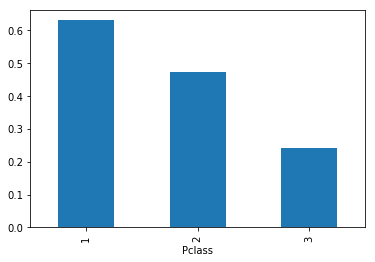

In [7]:
train.groupby('Pclass').Survived.mean().plot(kind='bar')

### 2. Does "Sex" have an impact on survivial rate?

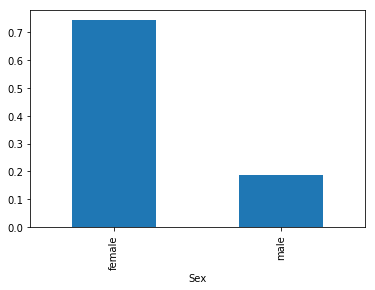

In [8]:
train.groupby('Sex').Survived.mean().plot(kind='bar')

### 3. What about combining both Pclass and sex category to predict survivial or not?

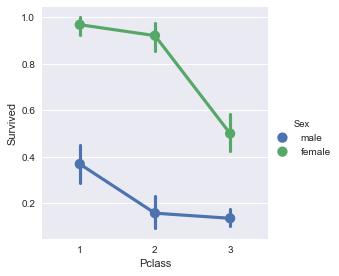

In [9]:
import seaborn as sns
sns.factorplot('Pclass','Survived',hue = 'Sex',data=train)

## Model 1: Use PClass and Sex as featuers to predict survival rate with a decisiontree classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [11]:
train['Sex']=train['Sex'].map({'male':0,'female':1}).astype(int)
test['Sex'] =test['Sex'].map({'male':0,'female':1}).astype(int)

- Try it on the training set first, split half and cross validate

In [12]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*5)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

76.631788739412059

- The cross-validation accuracy was ok - lower than 80% with 2 features

### 4. What about the impact of PARCH?

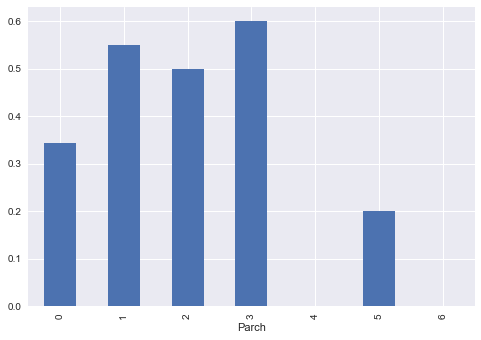

In [13]:
train.groupby('Parch').Survived.mean().plot(kind='bar')

In [14]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- combined Parch=2-6 as 1 category

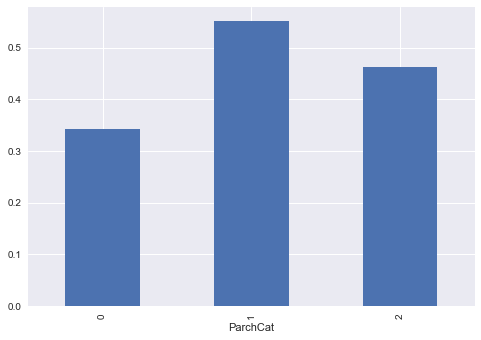

In [15]:
train['ParchCat'] = train.Parch.copy().astype(int)
train.loc[train.ParchCat>=2,'ParchCat']=2
test['ParchCat'] = test.Parch.copy().astype(int)
test.loc[test.ParchCat>=2,'ParchCat']=2
# plot the new category
train.groupby('ParchCat').Survived.mean().plot(kind='bar')

## Model 2: Adding ParchCat to Model 1, helping?

In [16]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*5)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass','ParchCat']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

78.77428998505232

- only helping a little bit

### 5. What about the impact of SibSp?

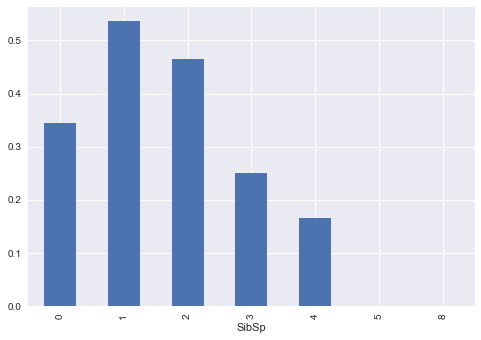

In [17]:
train.groupby('SibSp').Survived.mean().plot(kind='bar')

In [18]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- group Sibsp 2 and above into 1 category

In [19]:
train['SibSpCat'] = train.SibSp.copy().astype(int)
train.loc[train.SibSp>=2,'SibSpCat']=2
test['SibSpCat'] = test.SibSp.copy().astype(int)
test.loc[test.SibSp>=2,'SibSpCat']=2
train.SibSpCat.value_counts()

0    608
1    209
2     74
Name: SibSpCat, dtype: int64

## Model 3: Adding SibSpCat to Model 2, helping?

In [20]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*5)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass','ParchCat','SibSpCat']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

77.877428998505223

- Nope.. didn't help at all - drop this

### 6. What about the impace of 'embarked city'

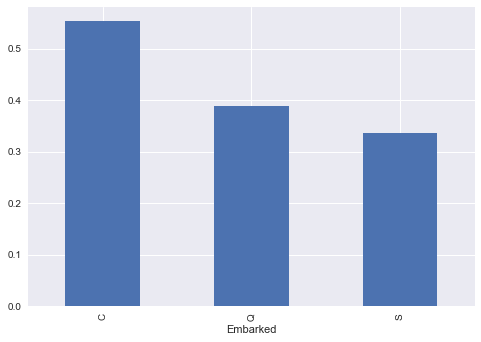

In [21]:
train.groupby('Embarked').Survived.mean().plot(kind='bar')

In [22]:
# Two missing values for Embarked in the training set!
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ParchCat,SibSpCat
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,0,0


In [23]:
train.groupby(['Embarked','Pclass']).Fare.agg(['max','median','min'])

max   median      min
Embarked Pclass                            
C        1       512.3292  78.2667  26.5500
         2        41.5792  24.0000  12.0000
         3        22.3583   7.8958   4.0125
Q        1        90.0000  90.0000  90.0000
         2        12.3500  12.3500  12.3500
         3        29.1250   7.7500   6.7500
S        1       263.0000  52.0000   0.0000
         2        73.5000  13.5000   0.0000
         3        69.5500   8.0500   0.0000

In [24]:
# use Pclass and fare to predict Embarked City [logistic regression]
embk_test = train[train.Embarked.isnull()]
embk_train = train[~train.Embarked.isnull()]
feature_col = ['Pclass','Fare']
X = embk_train.loc[:,feature_col]
y = embk_train.Embarked
X_test = embk_test.loc[:,feature_col]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
predicted_city = logreg.predict(X_test)
train.loc[train[train.Embarked.isnull()].index,'Embarked']=predicted_city
predicted_city

array(['S', 'S'], dtype=object)

In [25]:
test.Embarked.isnull().sum()
# no missing vlaue for Embarked in the test set..
# otherwise, use Pclass and fare to predict Embarked City in Test Set [logistic regression]

0

In [26]:
predicted_city

array(['S', 'S'], dtype=object)

## Model 4: Adding 'Fare' to Model 2, helping?

In [27]:
train['Embarked']=train.Embarked.map({'C':0,'Q':1,'S':2}).astype(int)
test['Embarked']=test.Embarked.map({'C':0,'Q':1,'S':2}).astype(int)

In [28]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*5)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass','ParchCat','Embarked']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

79.621325361235677

- OK.. adding Embarked city helped a little

### 6. What about the impace of 'Age'

In [29]:
# Note that there are some missing values for Age
train.Age.isnull().sum()

177

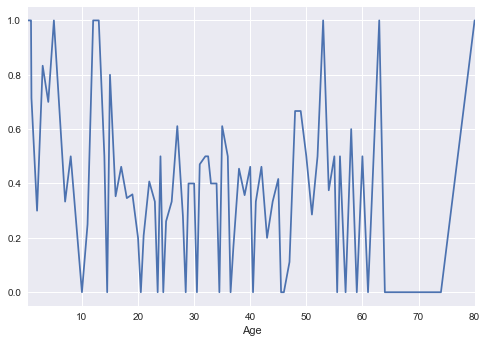

In [30]:
train.loc[train[train.Age.notnull()].index,:].groupby('Age').Survived.mean().plot(kind='line')

- Perhaps people <18 is more likely to survive

In [31]:
train['AgeCat']=train['Age'].copy()
train.loc[train.Age>18,'AgeCat']=1
train.loc[train.Age<=18,'AgeCat']=0
train.loc[train.Age.isnull(),'AgeCat']=np.nan
# What variables correlate with Age?
train.corr().AgeCat

PassengerId    0.005860
Survived      -0.097545
Pclass        -0.190441
Sex           -0.126253
Age            0.642925
SibSp         -0.394967
Parch         -0.290541
Fare           0.020397
Embarked       0.036081
ParchCat      -0.388508
SibSpCat      -0.319558
AgeCat         1.000000
Name: AgeCat, dtype: float64

In [32]:
test['AgeCat']=test['Age'].copy()
test.loc[test.Age>18,'AgeCat']=1
test.loc[test.Age<=18,'AgeCat']=0
test.loc[test.Age.isnull(),'AgeCat']=np.nan

In [33]:
# use ParchCat, SibSpCat, SibSp [PClass?] to predict AgeCat [logistic regression]
age_test  = train[train.AgeCat.isnull()]
age_train = train[train.AgeCat.notnull()]
feature_col = ['ParchCat','SibSpCat','SibSp']
X = age_train.loc[:,feature_col]
y = age_train.AgeCat
X_test = age_test.loc[:,feature_col]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
predicted_ageCat = logreg.predict(X_test)
predicted_ageCat
train.loc[train[train.AgeCat.isnull()].index,'AgeCat']=predicted_ageCat

In [34]:
# there are missing values of age in test set
# use ParchCat, SibSpCat, SibSp [PClass?] to predict AgeCat in the test set [logistic regression]
age_test  = test[test.AgeCat.isnull()]
age_train = test[test.AgeCat.notnull()]
feature_col = ['ParchCat','SibSpCat','SibSp']
X = age_train.loc[:,feature_col]
y = age_train.AgeCat
X_test = age_test.loc[:,feature_col]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
predicted_ageCat = logreg.predict(X_test)
predicted_ageCat
test.loc[test[test.AgeCat.isnull()].index,'AgeCat']=predicted_ageCat

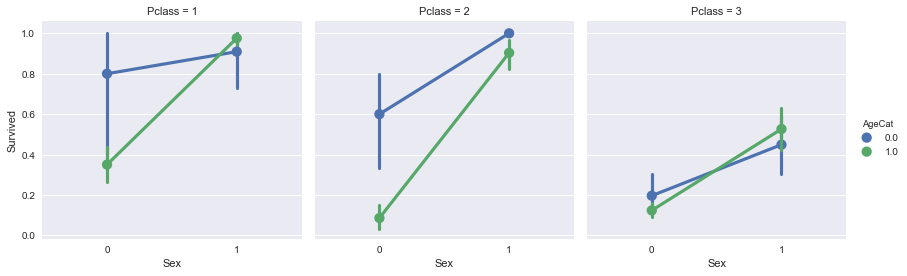

In [35]:
sns.factorplot('Sex','Survived',hue = 'AgeCat',col='Pclass',data=train)

- Interesting... using AgeCat might help prediction?!

## Model 5: Adding 'AgeCat' to Model 4, helping?
- does order matter?

In [36]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*5)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass','ParchCat','Embarked','AgeCat']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

80.019930244145485

- helping a little bit

### 7. What about the impace of 'Name'? (Title)

In [37]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Don           1
Capt          1
Lady          1
Ms            1
Jonkheer      1
Sir           1
Mme           1
Name: Title, dtype: int64

- too many types of title. Reduce into 5 categories [Mr, Miss, Mrs, Master, others]

In [38]:
train['TitleCat']=train['Title'].copy()
train.TitleCat.replace(to_replace=['Dr','Rev','Col','Mlle','Major','Capt','Countess',
                                   'Mme','Don','Ms','Lady','Jonkheer','Sir'],value=0,inplace=True)
train.TitleCat.replace('Mr',1,inplace=True)
train.TitleCat.replace('Miss',2,inplace=True)
train.TitleCat.replace('Mrs',3,inplace=True)
train.TitleCat.replace('Master',4,inplace=True)

In [39]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test['TitleCat']=train['Title'].copy()
test.TitleCat.replace(to_replace=['Dr','Rev','Col','Mlle','Major','Capt','Countess',
                                   'Mme','Don','Ms','Lady','Jonkheer','Sir'],value=0,inplace=True)
test.TitleCat.replace('Mr',1,inplace=True)
test.TitleCat.replace('Miss',2,inplace=True)
test.TitleCat.replace('Mrs',3,inplace=True)
test.TitleCat.replace('Master',4,inplace=True)
test.TitleCat.value_counts()

1    228
2    101
3     58
4     23
0      8
Name: TitleCat, dtype: int64

In [40]:
train.TitleCat.value_counts()

1    517
2    182
3    125
4     40
0     27
Name: TitleCat, dtype: int64

## Model 6: Adding 'TitleCat' to Model 5, helping?

In [41]:
accuracy = []
for i in range(0,9,1):
    cv_train= train.sample(frac=.75,random_state=i*99)
    cv_test = train.loc[~train.index.isin(cv_train.index),:]
    feature_col = ['Sex','Pclass','ParchCat','Embarked','AgeCat','TitleCat']
    X_train = cv_train[feature_col]
    y_train = cv_train['Survived']
    dtree.fit(X_train,y_train)
    X_test  = cv_test[feature_col]
    prediction = dtree.predict(X_test)
    accuracy.append((prediction == cv_test['Survived']).mean())
np.array(accuracy).mean()*100  # overallACC

80.518186347782759

- helping a little bit.. not much though..

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int32
ParchCat       418 non-null int32
SibSpCat       418 non-null int32
AgeCat         418 non-null float64
Title          418 non-null object
TitleCat       418 non-null int64
dtypes: float64(3), int32(4), int64(5), object(4)
memory usage: 45.8+ KB


## Finally, apply Model 6 to the test data

In [43]:
feature_col = ['Sex','Pclass','ParchCat','Embarked','AgeCat','TitleCat']
X_train = train.loc[:,feature_col]
y_train = train.Survived
dtree.fit(X_train,y_train)
X_test  = test.loc[:,feature_col]
prediction = dtree.predict(X_test)
test.PassengerId
result = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':prediction})
result.set_index(['PassengerId'],inplace=True)
result.to_csv('model6.csv')

- It turned out to be only 66% 
- Try harder!